<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/study/sklearn/creditcard_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[credit card fraud detection dataset kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('creditcard.csv')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [50]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X = df_copy.iloc[:, :-1]
    y = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, stratify=y)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(df)

In [51]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

(1) 로지스틱 회귀로 해결하기

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}\n'.format(accuracy, precision, recall, f1, roc_auc))

clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
 [[85283    12]
 [   60    88]]
정확도: 0.9992, 정밀도: 0.8800, 재현율: 0.5946, F1: 0.7097, AUC: 0.9593



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
def get_model_train_eval(model, X_train=None, X_test=None, y_train=None, y_test=None):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    get_clf_eval(y_test, pred, pred_proba)

(2) light gbm으로 해결하기

In [54]:
pip install lightgbm==2.2.1

In [55]:
from lightgbm import LGBMClassifier

# lightGBM의 boost_from_average 파라미터의 디폴트 값이 false에서 true로 변경됨
# 예제와 같이 레이블 값이 극도로 불균형한 분포를 이루는 경우 ROC_AUC 성능을 매우 저하시킴
# 따라서 boost_from_average=False로 설정
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm, X_train, X_test, y_train, y_test)

오차 행렬
 [[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568, F1: 0.8421, AUC: 0.9797



**데이터 분포도 변환 후**

<ipython-input-56-5903cffbb918>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])


<Axes: xlabel='Amount', ylabel='Density'>

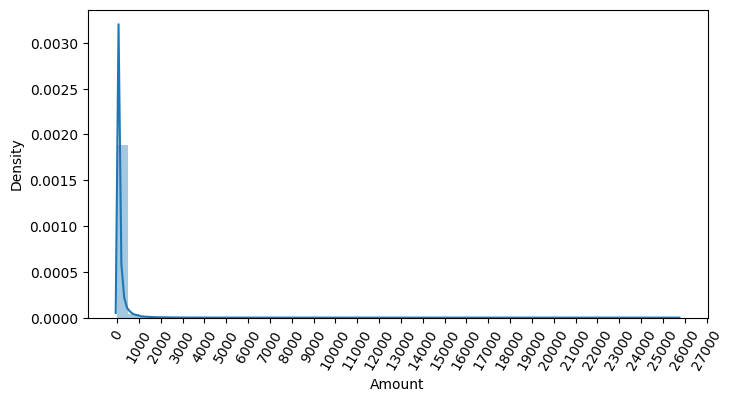

In [56]:
import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(df['Amount'])

In [57]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    scaler = StandardScaler()
    df_copy = df.copy()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(df)

In [58]:
print('(1) 로지스틱 성능')
clf = LogisticRegression()
get_model_train_eval(clf, X_train, X_test, y_train, y_test)

print('(2) LightGBM 성능')
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)
get_model_train_eval(lgbm, X_train, X_test, y_train, y_test)

(1) 로지스틱 성능
오차 행렬
 [[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1: 0.7143, AUC: 0.9702

(2) LightGBM 성능
오차 행렬
 [[85112   183]
 [  126    22]]
정확도: 0.9964, 정밀도: 0.1073, 재현율: 0.1486, F1: 0.1246, AUC: 0.5765



**로그 변환 후**

In [59]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(df)

In [60]:
print('(1) 로지스틱 성능')
get_model_train_eval(clf, X_train, X_test, y_train, y_test)

print('(2) LightGBM 성능')
get_model_train_eval(lgbm, X_train, X_test, y_train, y_test)

(1) 로지스틱 성능
오차 행렬
 [[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014, F1: 0.7149, AUC: 0.9727

(2) LightGBM 성능
오차 행렬
 [[85148   147]
 [  147     1]]
정확도: 0.9966, 정밀도: 0.0068, 재현율: 0.0068, F1: 0.0068, AUC: 0.5024



**이상치 데이터 제거 후**

### (1) IQR 방식을 적용
- IQR 방식 : 사분위 값의 편차를 이용하는 기법
- 사분위 : 전체 데이터를 값이 높은 순으로 정렬하고, 이를 1/4씩으로 구간을 분할하는 것을 말함
- 이 중, 25% 구간부터 75% 구간까지의 범위를 IQR이라고 함
- 이상치 데이터를 검출하는 방식

### (2) IQR을 이용해 이상치 데이터 검출하는 방법
- 75%에 IQR * 1.5를 더한 값이 최대값, 25%에 IQR * 1.5를 뺀 값이 최솟값
- 위에서 정한 최대/최소값을 넘어가는 수치는 이상치로 판정
- 1.5가 아닌 다른 값으로 정하기도 함

### (3) 이상치 데이터 제거하기
1. 어떤 피처의 이상치 데이터를 검출할 것인지 선택
2. 많은 피처가 있을 경우, 이들 중 결정값(레이블)과 가장 상관성이 높은 피처들을 위주로 이상치를 검출하는 것이 좋음
3. 방법
    - df.corr()을 이용해 상관도를 구한 뒤 heatmap으로 시각화

상관관계 히트맵에서 양의 상관관계가 높을수록 색깔이 진한 파란색, 음은 빨간색에 가깝게 표현
- 아래의 경우 v14와 v17

<Axes: >

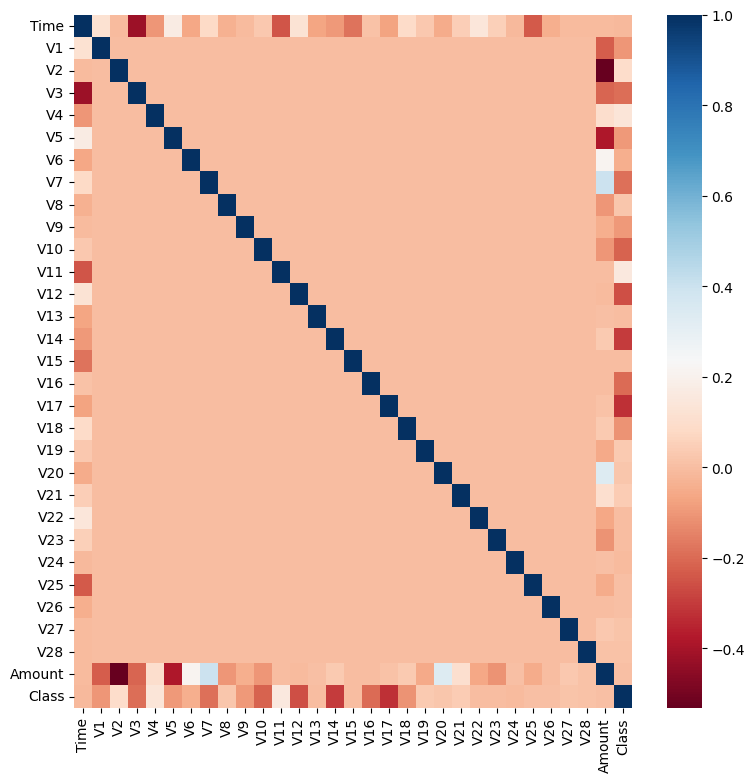

In [61]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = df.corr()
sns.heatmap(corr, cmap='RdBu')

In [62]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column] # fraud에 해당하는 column 데이터만
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr
    highest_val = quantile_75 + iqr

    outlier_index = fraud[(fraud < lowest_val)|(fraud > highest_val)].index
    return outlier_index

In [63]:
outlier_index = get_outlier(df=df, column='V14', weight=1.5)
print(outlier_index)

Int64Index([  8296,   8615,   9035,   9252,   9487,   9509,  10498,  10568,
             41943,  42549,  42590, 150601, 150644, 150647, 151103, 154286,
            157585, 157918],
           dtype='int64')


In [64]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

    outlier_index = get_outlier(df=df, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(df)

In [65]:
print('(1) 로지스틱 성능')
get_model_train_eval(clf, X_train, X_test, y_train, y_test)

print('(2) LightGBM 성능')
get_model_train_eval(lgbm, X_train, X_test, y_train, y_test)

(1) 로지스틱 성능
오차 행렬
 [[85280    15]
 [   55    87]]
정확도: 0.9992, 정밀도: 0.8529, 재현율: 0.6127, F1: 0.7131, AUC: 0.9746

(2) LightGBM 성능
오차 행렬
 [[85187   108]
 [  113    29]]
정확도: 0.9974, 정밀도: 0.2117, 재현율: 0.2042, F1: 0.2079, AUC: 0.6014



**SMOTE 오버 샘플링 적용 후**
- 반드시 학습 데이터만 오버 샘플링을 해야함

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [70]:
pd.Series(y_train_over).value_counts()

0    199020
1    199020
Name: Class, dtype: int64

In [72]:
clf = LogisticRegression()
get_model_train_eval(clf, X_train_over, X_test, y_train_over, y_test)

오차 행렬
 [[82932  2363]
 [   10   132]]
정확도: 0.9722, 정밀도: 0.0529, 재현율: 0.9296, F1: 0.1001, AUC: 0.9763



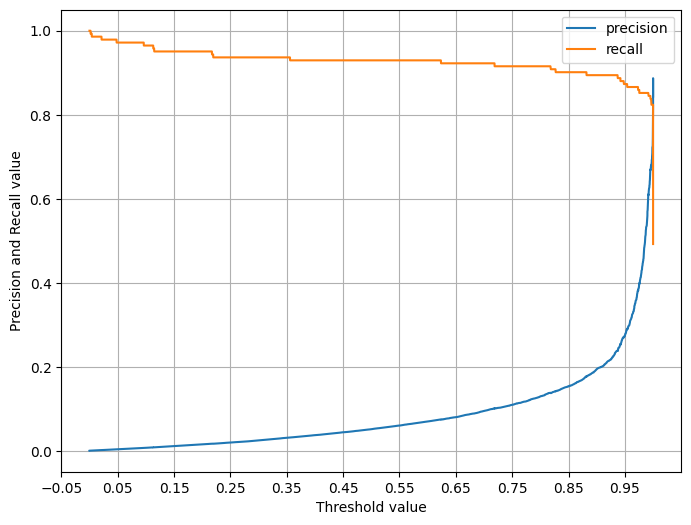

In [74]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def precision_recall_curve_plot(y_test, pred_proba_positive):

    '''prcision_recall_curve_plot
    정밀도와 재현율 트레이드오프 관계를 나타내는 그래프 그리기
    - 이진분류에서 주로 사용

    파라미터 : 정답 배열, Positive 칼럼의 예측 확률 배열
    - pred_proba_positive = model.predict_proba(X_test)[:, 1]
    '''

    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_positive)

    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, clf.predict_proba(X_test)[:, 1])

- 위처럼 로지스틱 회귀 모델의 경우, 분류 결정 임계값을 조정하더라도 임계값의 민감도가 너무 심해 올바른 재현율/정밀도 성능을 얻을 수 없음
- 다음으로 LightGBM을 사용해보기

In [75]:
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm, X_train_over, X_test, y_train_over, y_test)

오차 행렬
 [[85276    19]
 [   22   120]]
정확도: 0.9995, 정밀도: 0.8633, 재현율: 0.8451, F1: 0.8541, AUC: 0.9718



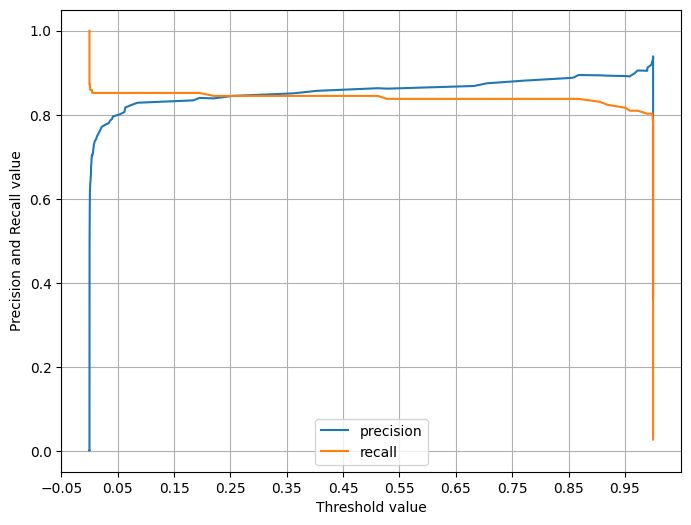

In [76]:
precision_recall_curve_plot(y_test, lgbm.predict_proba(X_test)[:, 1])